# Quelle sont les especes les plus adaptés au milieu urbain et quel endroit est le plus adapté au développement des arbres?

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("data/p2-arbres-fr.csv", delimiter=";", decimal=",")

### présentation du jeu de données


Le dataset contient des informations sur les arbres présents dans différentes localisations urbaines. 

Les colonnes comprennent des caractéristiques telles que la circonférence, la hauteur, le genre, l'espèce, etc. 

Notre objectif est d'analyser les espèces les plus adaptées à un environnement urbain et de déterminer les lieux les plus 

adaptés au développement des arbres.


### Analyse naive

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

On peut noter que les deux derniere colonnes geo point sont certainement des valeur numériques

#### Renaming columns

In [4]:
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

### Suppression de features

Notre problématique indiqué au début de notre notebook nous aigui sur les features intéressantes a garder pour notre analyse 


In [23]:
df.shape[0] == df["id"].unique().shape[0]

True

In [29]:
#id est une valeur unique pour chaque ligne
#les geopoints sont des informations trop précise, nous utiliserons d'autre features comme l'arrondissement
#id emplacement ne nous intéresse pas
df.drop(columns=["id", "geo_point_2d_a", "geo_point_2d_b", "id_emplacement"], inplace=True)

### Analyse univariée

In [6]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.85762,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [7]:
from matplotlib import pyplot as plt

In [8]:
df["circonference_cm"].max()

np.int64(250255)

#### Affichage des valeurs nulles en barplot

<Figure size 1000x600 with 0 Axes>

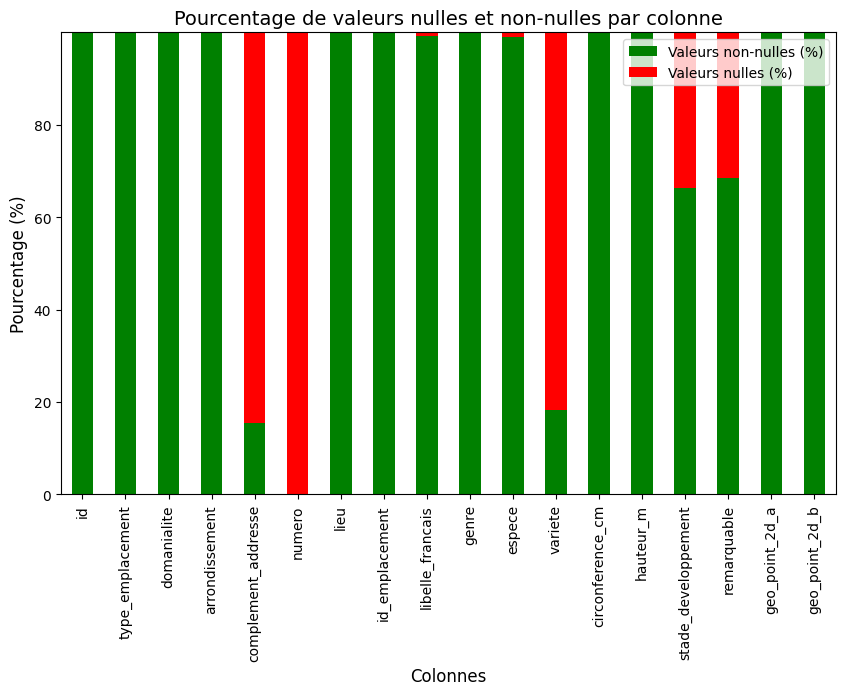

In [9]:

import matplotlib.pyplot as plt

# Supposons que df soit ton DataFrame

# Calculer le pourcentage de valeurs nulles et non-nulles par colonne
pourcentage_null = (df.isnull().sum() / len(df)) * 100
pourcentage_non_null = 100 - pourcentage_null

# Créer un DataFrame avec les deux pourcentages
pourcentage_df = pd.DataFrame({
    'Valeurs nulles (%)': pourcentage_null,
    'Valeurs non-nulles (%)': pourcentage_non_null
})

# Créer un graphique en barres empilées
plt.figure(figsize=(10, 6))
pourcentage_df[['Valeurs non-nulles (%)', 'Valeurs nulles (%)']].plot(
    kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Ajouter des labels et un titre
plt.title('Pourcentage de valeurs nulles et non-nulles par colonne', fontsize=14)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)

# Afficher la légende et le graphique
plt.legend(loc='upper right')
plt.show()


On peut déja conclure de la colonne “numero” ne va pas nous servir car elle ne contient aucune information. De meme pour “complement adresse” ou “variete” 

on retire ces 3 colonnes 

In [10]:
df.drop(columns=["numero","complement_addresse", "variete"], inplace=True)

#### Analyse des colonnes numériques

In [11]:
df_number = df.select_dtypes(include=["number"])
df_number.columns

Index(['id', 'circonference_cm', 'hauteur_m', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

Nous ne ferons pas d'analyse sur **id** qui est simplement un identifiant pour les arbre dans ce dataframe      
**Remarquable** sera analysé avec les autres variables catégorielle     
**Geopoint** sont des variables trop précises pour notre analyse, nous nous concentrerons sur les arrondissement 

In [12]:
df_number.drop(columns=["id","remarquable", "geo_point_2d_a", "geo_point_2d_b"], inplace=True)

In [13]:
df_number

,circonference_cm,hauteur_m
0,20,5
1,65,8
2,90,10
3,60,8
4,38,0
...,...,...
200132,0,0
200133,0,0
200134,0,0
200135,0,0


### Analyse des variables descriptives

In [14]:
df_object = df.select_dtypes(include=["object"])
df_object["remarquable"] = df["remarquable"]

Nombre de valeur unique pour chaque colonnes

In [15]:
for col in df_object:
    print(col,"a",len(df_object[col].value_counts()), "valeur(s) unique(s)")

print("Nombre de ligne du df_object:", df_object.shape[0])


type_emplacement a 1 valeur(s) unique(s)
domanialite a 9 valeur(s) unique(s)
arrondissement a 25 valeur(s) unique(s)
lieu a 6921 valeur(s) unique(s)
id_emplacement a 69040 valeur(s) unique(s)
libelle_francais a 192 valeur(s) unique(s)
genre a 175 valeur(s) unique(s)
espece a 539 valeur(s) unique(s)
stade_developpement a 4 valeur(s) unique(s)
remarquable a 2 valeur(s) unique(s)
Nombre de ligne du df_object: 200137


Beaucoup trop de valeur unique pour ''' "id_emplacement", "lieu", "libelle_francais", "genre", "espece" ''' pour les afficher en bar plot, on va donc regarder les 10 valeur les plus présentes

In [16]:
from IPython.display import display

lot_of_row = ["id_emplacement", "lieu", "libelle_francais", "genre", "espece"]
df_list = {}
for col in lot_of_row:
    df_temp = df_object[[col]].value_counts().reset_index()
    result = df_object[[col]].value_counts() * 100 / df_object[col].shape[0]
    df_temp["repartition_pourcentage"] = result.reset_index()["count"]
    df_temp["repartition_pourcentage"] = df_temp["repartition_pourcentage"].apply(lambda x: f"{x:.2f}")
    df_list[col] = df_temp

    print(col.upper())
    display(df_list[col],display_id=col)

ID_EMPLACEMENT


,id_emplacement,count,repartition_pourcentage
0,101001,1324,0.66
1,101002,1241,0.62
2,101003,1128,0.56
3,202001,1032,0.52
4,101004,1020,0.51
...,...,...,...
69035,80269,1,0.00
69036,80270,1,0.00
69037,80271,1,0.00
69038,80272,1,0.00


LIEU


,lieu,count,repartition_pourcentage
0,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,2995,1.50
1,PARC DES BUTTES CHAUMONT,2331,1.16
2,PARC ANDRE CITROEN,2095,1.05
3,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,1478,0.74
4,INSEP / AVENUE DU TREMBLAY,1293,0.65
...,...,...,...
6916,CIMETIERE DU PERE LACHAISE / AVENUE DES THUYAS...,1,0.00
6917,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 10,1,0.00
6918,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 4,1,0.00
6919,CARREFOUR ODEON,1,0.00


LIBELLE_FRANCAIS


,libelle_francais,count,repartition_pourcentage
0,Platane,42508,21.24
1,Marronnier,25207,12.59
2,Tilleul,21305,10.65
3,Erable,18389,9.19
4,Sophora,11797,5.89
...,...,...,...
187,Maackie,1,0.00
188,Ormeau épineux,1,0.00
189,Ostryer,1,0.00
190,Papayer,1,0.00


GENRE


,genre,count,repartition_pourcentage
0,Platanus,42591,21.28
1,Aesculus,25341,12.66
2,Tilia,21550,10.77
3,Acer,18471,9.23
4,Sophora,11830,5.91
...,...,...,...
170,Sciadopitys,1,0.00
171,Phoenix,1,0.00
172,Phyllanthus,1,0.00
173,Pistacia,1,0.00


ESPECE


,espece,count,repartition_pourcentage
0,x hispanica,36409,18.19
1,hippocastanum,20039,10.01
2,japonica,11822,5.91
3,n. sp.,9063,4.53
4,tomentosa,8962,4.48
...,...,...,...
534,robusta,1,0.00
535,rosmarinifolia,1,0.00
536,rufa,1,0.00
537,rysophylla,1,0.00


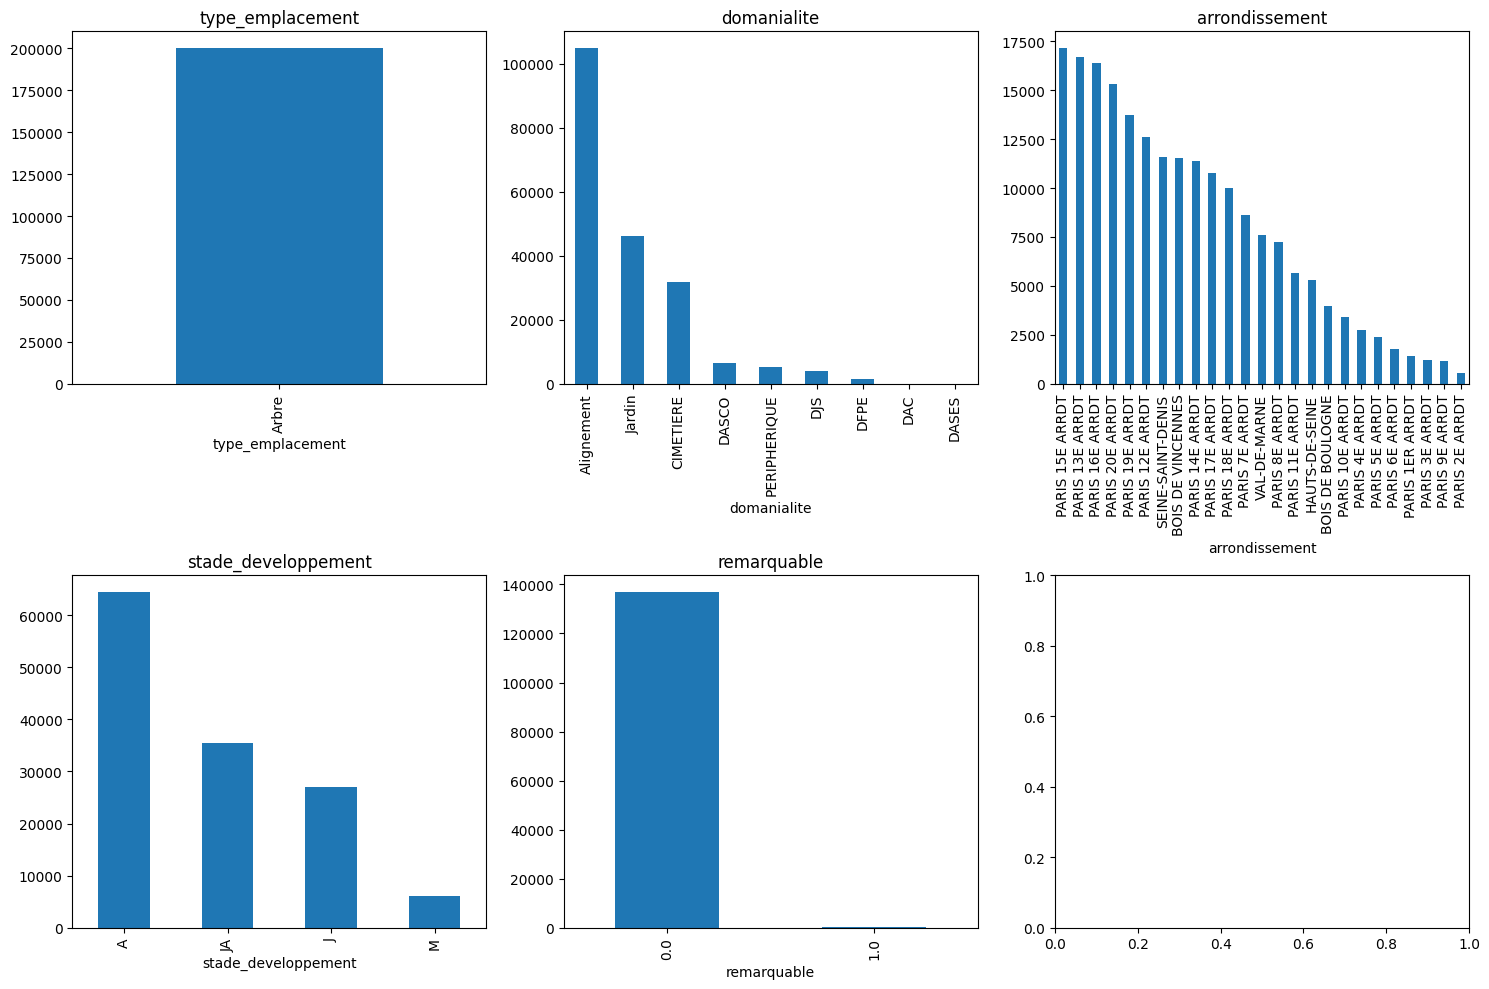

In [17]:
lot_of_row = ["id_emplacement", "lieu", "libelle_francais", "genre", "espece"]

df_plot_objet = df_object.drop(columns=lot_of_row)

num_plots = df_plot_objet.shape[1]

num_cols = 3

num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()
i= 0
for col in df_object.drop(columns=lot_of_row):
    
    value_counts = df_object[col].value_counts()
    
    value_counts.plot(kind="bar", ax=axes[i], title=col)
    i+=1
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()